<a href="https://colab.research.google.com/github/sbbzplt/QWorld-Cobalt/blob/master/notebooks/QUBO_PenaltyMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;">
        <a href="https://qworld.net/" target="_blank"><img src="https://github.com/sbbzplt/QWorld-Cobalt/blob/master/images/QWorld.png?raw=1"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;">
        Prepared by <a href="https://gitlab.com/sabahuddin.ahmad" target="_blank"> Sabah Ud Din Ahmad </a></td>
    </tr>
 </table>

<hr>

In [1]:
!git clone https://github.com/sbbzplt/QWorld-Cobalt
%cd QWorld-Cobalt/notebooks/

Cloning into 'QWorld-Cobalt'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 202 (delta 89), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (202/202), 3.83 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/QWorld-Cobalt/notebooks


# QUBO Formulation with Penalty Method

In the previous section, we learnt about the maximum cut problem where the problem characteristics led directly to an optimization problem in the desired QUBO form. The natural QUBO form contains no constraints.

However, there are many problems that include constraints that must be satisfied to reach an optimum solution. Many of these constrained problems can be reconverted to formulate the desired QUBO form using a method known as **penalty method**.

In [2]:
%run qubo_functions.py

## Constrained problems

In constrained problems, a set of constraints need to be satisfied while minimizing an objective function.

### Task 1

Consider the objective function $f(x_1,x_2) = 5x_1 + 7x_1x_2 - 3x_2$. Find $x_1$ and $x_2$ that minimizes $f(x_1,x_2)$ subject to the constraint $x_1-x_2 = 0$.

In [5]:
interact(task_1, x1=(0, 1), x2=(0, 1));

interactive(children=(IntSlider(value=0, description='x1', max=1), IntSlider(value=0, description='x2', max=1)…

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task1)

## Penalty method

Using the penalty method, a constrained optimization problem can be converted into an unconstrained problem.

To create the corresponding unconstrained problem, **penalty terms** are added to the original objective function. Suppose that $f(x)$ is the objective function to be minimized. Then we obtain

$$
f(x) + \sum_i P_i \cdot g_i(x),
$$
which becomes the new objective function to be minimized. Here, $g_i(x)$ is the penalty term and $P_i$ is the corresponding penalty coefficient. For each constraint $i$, the term $g_i(x)$  formulated so that it is equal to zero if the constraint is not violated and it is a positive value otherwise.

The **penalty coefficient** $P_i$ is a positive scalar which determines the how severly the objective function is increased in case the constraint is violated. More insight about choosing $P_i$ is given in the rest of the notebook.

<a id="cases"></a>
### Specific Cases

For specific constraints, there are some useful known quadratic penalty terms that can be added to the objective function.

|Classical Constraint|    Equivalent Quadratic Penalty         |
|:-----|:-----------|
|$x+y \leq 1$ |$xy$ |
|$x+y \geq 1$ |$1-x-y+xy$|
|$x+y=1$ |$1-x-y+2xy$ |
|$x \leq y$ |$x-xy$ |
|$x_1+ x_2+x_3 \leq 1$ |$x_1x_2+x_1x_3+x_2x_3$ |
|$x=y$ |$x+y-2xy$ |

<div class="alert alert-block alert-info">All variables here are binary variables. Note that penalty term evaluates to 0 iff corresponding constraint is satisfied.</div>

### Task 2

Consider an objective function of the form $f(x_1,x_2)$ which is subjected to the constraint $x_1+ x_2 \leq 1$. Express the problem as a QUBO.

Note: You can leave penalty coefficient as $P$, you don't need to choose a specific value for this task.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task2)


### Task 3

Consider an objective function of the form $f(x_1,x_2)$ which is subjected to the constraint $x_1+ x_2 = 1$. Express the problem as a QUBO.

Note: You can leave penalty coefficient as $P$, you don't need to choose a specific value for this task.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task3)


### Task 4

Express the constrained problem given in Task 1 as a QUBO.

Note: You can leave penalty coefficient as $P$, you don't need to choose a specific value for this task.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task4)

### Transforming problems with linear equality constraints

<div class="alert alert-block alert-info">
We will assume that we are not restricted to binary variables but integer variables are also allowed when discussing the transformations to keep it more general. Later on, we will show how to convert integer variables to binary variables.
</div>

Suppose we have integer variables $y_1,\dots,y_k$ and suppose that $f(y_1,\dots,y_k)$ is our objective function to be minimized.

Suppose that we are given a constraint in the form of a linear equality
$$\sum_{i=1}^{k} a_iy_i=b$$

where $a_i, b \in \mathbb{R}$.

The transformation results in the following objective function,

$$f(y_1,\dots,y_k)+P \cdot \left( \sum_{i=1}^{k}a_iy_i-b\right)^2$$


### Task 5

Let $f(x_1,x_2,x_3)=-5x_1-2x_1x_2 -3x_3$ which is subjected to the constraint $x_1+ x_2 + x_3 = 1$. Express the problem as a QUBO using the penalty method.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task5)

### Selection of the penalty coefficient

How large the penalty coefficient $P$ should be? This depends on the specific problem we would like to solve. The idea is that it shouldn't be too small so that a constraint is violated in favor of having a smaller $f(x)$. You may think that there is no harm in setting $P$ as large as possible, but in practice, the methods for solving QUBO may not distinguish between feasible solutions with different objective values if $P$ is too large compared to $f(x)$.

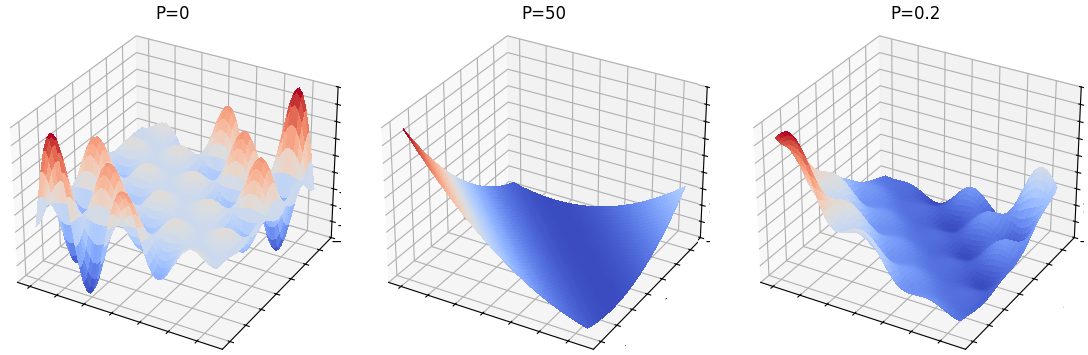

### Task 6

For the QUBO formulation you obtained in Task 5,
- Form the $Q$ matrix
- Try setting different values for $P$ and call the `test_penalty` function.

What is the minimum possible value for $P$ so that no constraint is violated? Evaluate the results.

Note: Don't forget to add the constant term to get the real objective function value after getting the result from `qubo_solver`.

In [3]:
%run qubo_functions.py

In [7]:
import numpy as np
def test_penalty(P):
    #Populate the Q matrix
    Q = np.array([[ , , ],
                  [ , , ],
                  [ , , ]])
    return qubo_solver(Q)

In [ ]:
for P in range (0, 1000, 10):
    print("Penalty:",P, test_penalty(P))

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task6)

### Transforming problems with linear inequality constraints

Given a linear inequality of the form,

$$\sum_{i=1}^{k} a_iy_i \leq b$$

it should be first transformed into an equality constraint using non-negative *integer* slack variables i.e., $\eta \geq 0$.

$$\sum_{i=1}^{k} a_iy_i+\eta=b$$

The transformation results in the following objective function,

$$f(y_1,....,y_k)+P\cdot \left( \sum_{i=1}^{k}a_iy_i+\eta-b\right)^2$$

<div class="alert alert-block alert-info">
    
Note that, $\eta$ is an integer variable and it needs to be expresessed using binary variables as well.

<div class="alert alert-block alert-info">
    
When you have an inequality of the form $\geq$, it will be more convenient to transform it into an inequality of the form $\leq$
to convert into an equality.

## Transforming integer variables to binary variables

Since we considered integer variables $y_1,\dots,y_k$ and $\eta$ and QUBO uses binary decision variables, we should convert our integer variables to binary variables.

First, we need to define the lower and the upper bound for each integer variable. For variables $y_i$, this is usually determined by the problem definition. For integer variables $y_1,\dots,y_k$, suppose that we have $\underline{\rm y_i} \leq y_i \leq \overline{\rm y_i}$ which can be expressed as $y_i \in \{\underline{\rm y_i},\dots,\overline{\rm y_i}\}$.

$y_i$ can be expressed using binary varaibles $x_j^i \in \{0,1\}$ as follows:

$$
\underline y_i+\sum_{j=0}^{N-2}2^j x_{j}^i+\bigl (\overline{y_i}- \underline{y_i} - \sum_{j=0}^{N-2}2^j\bigr)x_{N-1}^i,
$$
where $N = \lceil \log_2(\overline y_i-\underline y_i+1)\rceil $.

Similarly for $\eta$, we first need to determine the upper and lower bounds for. In this case, those bounds depend on the linear inequality and can be expressed as follows:

$$0\leq \eta \leq  \left(b- \sum_{i=1}^{k} \min \{a_i\underline{\rm y_i}, a_i\overline{\rm y_i}\}\right).$$

The rest is similar to the conversion of $y_i$ variables.

<div class="alert alert-block alert-info">
    Note that here it is assumed that the inequality is of the form $\sum_{i=1}^k a_iy_i \leq b$.
</div>

### Task 7


Consider an objective function of the form $f(y_1,y_2)$ where $y_1$ and $y_2$ are integer variables and $0 \leq y_1 \leq 8$ and $0 \leq y_2 \leq 5$, which is subjected to the constraint $y_1+ y_2 \geq 10$. Express the problem as a QUBO.

Note: You can leave penalty coefficient as $P$, you don't need to choose a specific value for this task.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task7)
***

### Task 8

Consider an objective function of the form $f(y_1,y_2)$ where $y_1$ and $y_2$ are integer variables and $2 \leq y_1 \leq 8$ and $3 \leq y_2 \leq 5$, which is subjected to the constraint $y_1+ 2y_2 \leq 10$. Express the problem as a QUBO.

Note: You can leave penalty coefficient as $P$, you don't need to choose a specific value for this task.

[click here for solution](QUBO_PenaltyMethod_Solutions.ipynb#task8)
***

## Integer linear programming (ILP)

*Integer linear programming* is a mathematical model for problems defined over integer variables with a linear objective function and a set of linear constraints. Formally, an integer linear program is defined as
$$
\text{minimize} \hspace{1em} \sum_{j} c_j y_j \\
\text{subject to} \hspace{1em } \sum_{j} A_{ij}y_j \leq b_i, \hspace{1em} i=1,\dots,m \\
{} y_j \geq 0, y_j \in \mathbb{Z}
$$
where $A_{ij}\in \mathbb{R}$, $b_i\in \mathbb{R}$, $ c_j \in \mathbb{Z} $. ILP problem is known to be NP-Hard. In case the objective function is a quadratic polynomial, then the model is named as *integer quadratic programming* (IQP).

Note that using the penalty method and the method for transforming integer variables into binary, any ILP or IQP can be converted into an equivalent QUBO.
***

### References
***
1. Wikipedia contributors. (2021). *Penalty method.* Wikipedia, The Free Encyclopedia. [Link](https://en.wikipedia.org/w/index.php?title=Penalty_method&oldid=1020411673)
2. Fred Glover, Gary Kochenberger, Yu Du. (2019). *Quantum Bridge Analytics I: A Tutorial on Formulating and Using QUBO Models.* [[arXiv Preprint]](https://arxiv.org/abs/1811.11538)
3. Ozlem Salehi, Adam Glos, Jaroslaw Adam Miszczak. (2021). *Unconstrained Binary Models of the Travelling Salesman Problem Variants for Quantum Optimization.* [[arXiv Preprint]](https://arxiv.org/abs/2106.09056)
4. Sahar Karimi, Pooya Ronagh. (2019). *Practical Integer-to-Binary Mapping for Quantum Annealers*. Quantum Information Processing, Vol. 18, No. 4, 94. [[arXiv Preprint]](https://arxiv.org/abs/1706.01945)